In [1]:


# %pip install numpy Pillow matplotlib librosa seaborn statsmodels



<br>

# `Topics:`

- #1: Introductory Talk
- #2: Descriptive  VS Inferential Statistics
- #3: Population VS Sample
- #4: Measure of Central Tendency
- #5: Measure of Dispertion/Variation/Variability
- #6: Quantiles
- #7: 5 Number Summary And BoxPlot

<br>


<br>
<br>

# `#01 Introductory Talk:`

<br>
<br>

Why should we focus on statistics for ML (Machine Learning)?

  * Machine learning is about training a machine. To train it, I need to provide it with information, or data, specifically reliable data. Statistics deals with data. So, we must know the basics of statistics.
 
<br>
<br>
  
### **Types of Data in Statistics:**

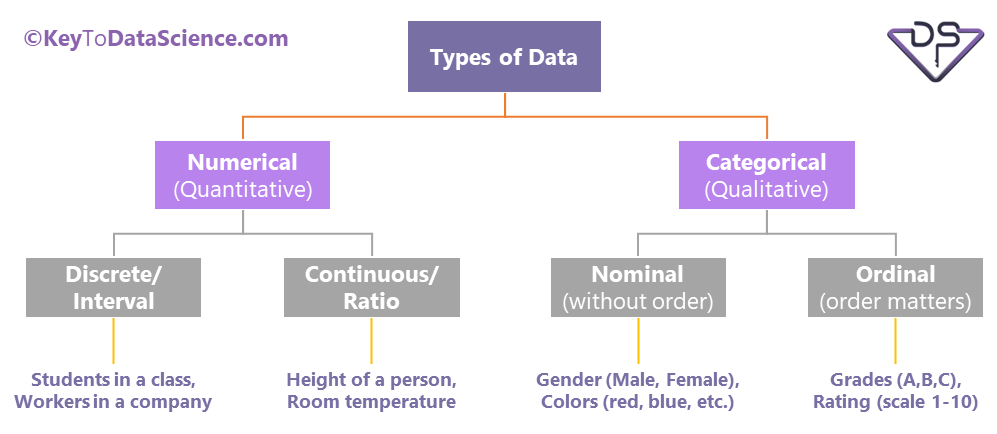

In [2]:
from IPython.display import display,Image 
display(Image("img/img04.png"))

<br>

### **What Data type we use to train a model?**

<br>

**Statistics deals with data, but for an ML(Machine Learning) model to learn from data, we must convert the data into numbers. In Python, a lot of work with numbers is done using `array` and `numpy`.**


<br>

### **Why numpy? Why not python array?**

<br>


- আমরা ml এ  number নিয়ে কাজ করবো । এখন , ইচ্ছে করলে কাজ গুলো python list দিয়ে করতে পারবো, vector এর জন্য 1D list and matrix এর জন্য 2D list , তাহলে আমরা কেন numpy and pandas শিখতেছি? 

- Numpy is almost 50 times faster than python list.

- Real life data in csv or exel or tabular format.Pandas DataFrame (NumPy- built top on Numpy) we can easily handle  missing values fill, filtering, grouping, merging, time-series analysis etc. 




In [3]:
""" 
#
#  <------------- Python list --------------------->
#  time testing 
#
"""
import time 

list = [val for val in range(10000000)]
print(f"type: {type(list)}")
print(f"size of list: {len(list)}")

start_time = time.time()
ans = [2 * val for val in list]
end_time = time.time()
difference_python_list = end_time - start_time
difference_python_list


type: <class 'list'>
size of list: 10000000


1.0659184455871582

In [4]:
2 * list[:5]

[0, 1, 2, 3, 4, 0, 1, 2, 3, 4]

In [5]:
""" 
#
# <-------------------- With numpy ---------------------->
# time test with numpy array
#
"""

import numpy as np 
np_list = np.linspace(start=0,stop=10000000,num=10000000)

print(f"type: {type(np_list)}")
print(f"size of npList1: {len(np_list)}")

start_time = time.time()
ans = 2 * np_list
end_time = time.time()

diff_numpy_list = end_time - start_time
diff_numpy_list

type: <class 'numpy.ndarray'>
size of npList1: 10000000


0.38278770446777344

In [6]:

((difference_python_list-diff_numpy_list)/difference_python_list) * 100


64.08846229723363

<br>

### **Proof we give numerical data in ML model:**

<br>

- **Text:**
    I am Yasin.
    ```python
            I = [1, 0, 0]
            am = [0, 1, 0]
            Yasin = [0, 0, 1]
    ```
- **Voice:**
    When working with audio data, we first have analog (continuous, time-domain) voice data. We then convert this analog voice data to digital (time-domain). After that, we use a short-time Fourier transform to convert it to digital (frequency-domain). Then, if necessary, we do preprocessing (MFCC, noise removal, etc.); otherwise, we feed it to the ML model.
- **Image:**
    An image is nothing but a matrix.

<br>

### **Voice Data Example:**

<br>

In [7]:

import librosa  
import numpy as np 
import matplotlib.pyplot as plt 

# analog continous data to digital data
# Analog Time-Domain to Digital Time-Domain
audio, sr = librosa.load("img/music.mp3")
sr

22050

In [8]:
""" 
**********************************************
- audio is nothing but a vector
- each value of this vector contain, frequency
**********************************************
"""
# mono sound
print(audio.shape)
print(audio)


(110502,)
[ 1.4861031e-03  2.5837226e-03  1.8543079e-03 ...  4.5327914e-07
 -2.7199003e-06  5.4488096e-06]


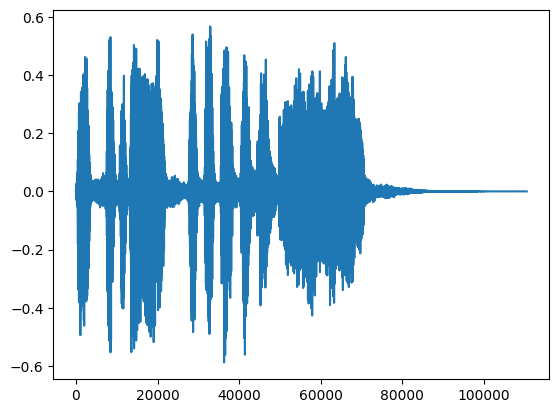

In [9]:

# **Analog Signal**: Continous value
# **Digital Singal**: only contains (0,1)
plt.plot(audio)
plt.show()


[[0.02665525 0.08260486]
 [0.0549923  0.16057767]]
shape: (1025, 216)


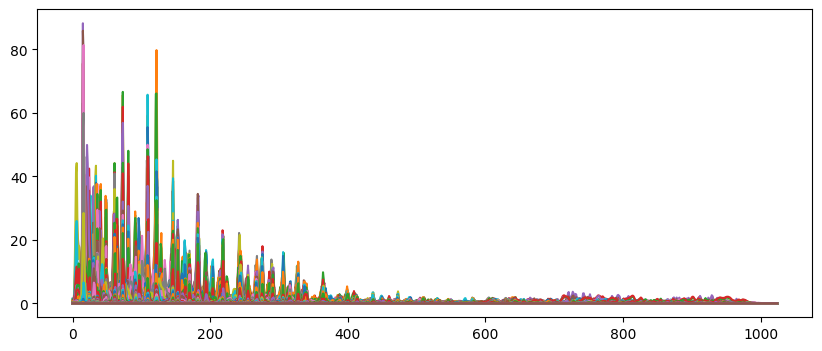

In [10]:

# short time fourirer analysis(stft): Digital Time Domain to Frequency Domain
# ignore -ve part 
spectrogram = abs(librosa.stft(audio))
print(spectrogram[:2,:2])
#shape(frequency_bin,time_frame)
print(f"shape: {spectrogram.shape}")
plt.figure(figsize=(10,4))
plt.plot(spectrogram)
plt.show()


<br>

### `#Image Example:`

<br>

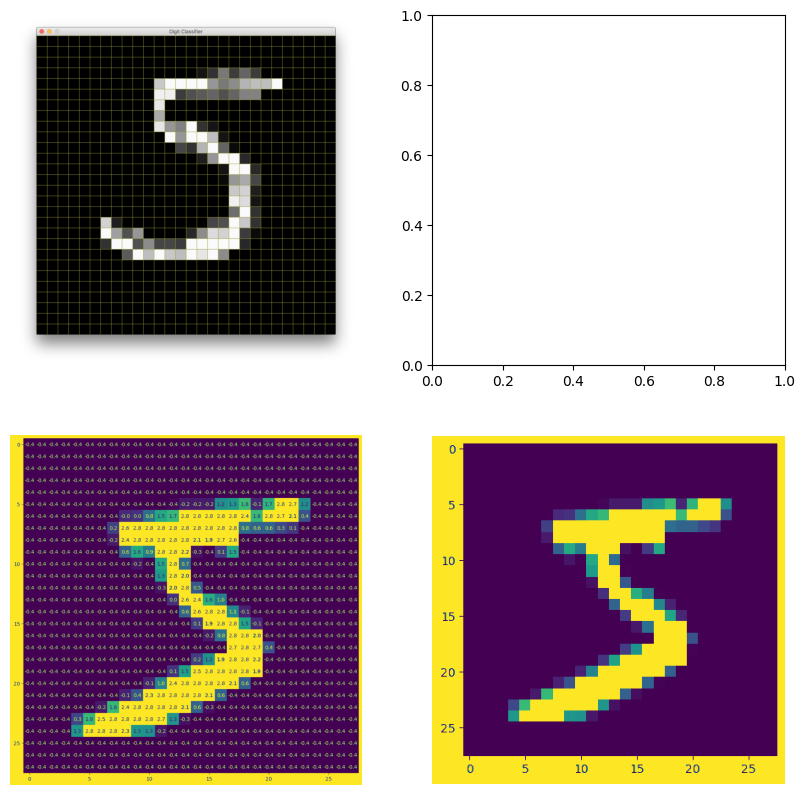

In [11]:
from PIL import Image
import matplotlib.pyplot as plt 

img1 = Image.open("img/img01.png")
img2 = Image.open("img/img02.png")
img3 = Image.open("img/img03.png")

fig,((ax1,ax2),(ax3,ax4))= plt.subplots(2,2,figsize=(10,10))
ax1.imshow(img1)
ax1.axis("off")

ax3.imshow(img2)
ax3.axis("off")

ax4.imshow(img3)
ax4.axis("off")
plt.show()

In [12]:
import numpy as np 

# convert the image into numpy array:)
img = np.array(img2)
print(f"shape of img2: {img.shape}")


""" 
***************************************************************
Conculation: Image is nothing but a high dimentation of matrix.
***************************************************************
"""

img 

shape of img2: (967, 971)


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], shape=(967, 971), dtype=uint8)


<br>
<br>

# `#02 Descriptive  VS Inferential Statistics:`

<br>
<br>


### Descriptive Statistics

Descriptive statistics provides a **summary** and **description** of the data you have collected. It doesn't make any generalizations or conclusions beyond the dataset itself. The goal is to organize, visualize, and summarize data in a meaningful way. 

* **Key Topics:**
    * **Measures of Central Tendency:** These describe the center or typical value of a dataset.
        * **Mean:** The average of all the numbers.
        * **Median:** The middle value when the data is ordered.
        * **Mode:** The value that appears most frequently.
    * **Measures of Variability (Dispersion):** These describe how spread out the data is.
        * **Range:** The difference between the highest and lowest values.
        * **Standard Deviation:** The average distance of each data point from the mean.
        * **Variance:** The average of the squared differences from the mean.
    * **Frequency Distribution:** Shows how often each value appears in the data, often displayed in tables, histograms, or bar charts.
    * **Graphical Representations:** Visual tools to present data, such as bar charts, pie charts, histograms, and scatter plots.

* **Example:** You collect the test scores of 30 students in a class. Using descriptive statistics, you can calculate the average score (mean), find the most common score (mode), and see the spread of the scores (standard deviation). This only tells you about this specific group of 30 students.

***

### Inferential Statistics

Inferential statistics uses a **sample** of data to make **inferences** and **predictions** about a much larger **population**. It allows you to draw conclusions and test hypotheses that extend beyond the immediate data you have collected.

* **Key Topics:**
    * **Hypothesis Testing:** A formal procedure to test a claim or assumption about a population based on sample data. This includes:
        * **t-tests:** Used to compare the means of two groups.
        * **ANOVA (Analysis of Variance):** Used to compare the means of three or more groups.
        * **Chi-square tests:** Used to determine if there's a relationship between two categorical variables.
        * **p-value:** The probability of observing a result if the null hypothesis is true.
    * **Confidence Intervals:** A range of values used to estimate the true value of a population parameter. For example, a "95% confidence interval" means that if you took many samples and built a confidence interval from each, 95% of those intervals would contain the true population parameter.
    * **Regression Analysis:** A statistical method for examining the relationship between variables, often used for predicting outcomes.
        * **Linear Regression:** Models the relationship between a dependent variable and one or more independent variables.
    * **Probability Distributions:** The foundation of inferential statistics, which describes the possible values a random variable can take and how often they occur.

* **Example:** You want to know the average height of all adults in a city. You can't measure everyone, so you take a random **sample** of 500 people. Using inferential statistics, you can calculate the average height of your sample and then **infer** a conclusion about the average height of the entire city's population, along with a confidence interval that quantifies the uncertainty of your estimate.

<br>
<br>

# `#03 Population VS Sample:`

<br>
<br>

**Population** is the entire group you want to draw conclusions about, while a **sample** is a specific subset of that group selected for study.


#### Examples:
1.  All cricket fans vs. fans who were present in the stadium.
2.  All students vs. students who visit college for lectures.

#### Things to be careful about when collecting samples:
**Assume, we want to calculate average height of the people of Bangladesh**
1.  **Sample Size:** The size of the sample should be appropriate for the population.
2.  **Random:** The sample should be selected randomly from the population.
3.  **Representative:** The sample should accurately represent the diversity and variations found within the population.



<br>
<br>

# `#04 Measure of Central Tendency:`

<br>
<br>

A measure of central tendency is a statistical measure that represents a typical or
central value for a dataset. 

- Mean
$$\bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}$$

- Median
* If n is odd: The median is the value at the position $\frac{n+1}{2}$.
* If n is even:The median is the average of the two middle values, at positions $\frac{n}{2}$ and $\frac{n}{2}+1$.

- Mode
The mode is the most frequent value. There is no formula for it.


In [13]:

import numpy as  np 

array = np.array([2, 4, 5, 7,7,7,8])

# mean:
mean = array.sum()/len(array)
print("mean: {}".format(mean))

mean = array.mean()
print("mean inbuild function: {}".format(mean))

mean: 5.714285714285714
mean inbuild function: 5.714285714285714


In [14]:

# median:
np.median(array)

np.float64(7.0)

In [15]:
from scipy.stats import mode
#mode:
mode(array)

ModeResult(mode=np.int64(7), count=np.int64(3))

<br>
<br>

# `#05 Measure of Dispertion/Variation:`

<br>
<br>


In [16]:

# Limitation of means:

print("*"*20)
arr1 = np.array([-20,-10,-5,5,10,20])
print(f"mean of arr1: {arr1.mean()}")


print("*"*20)
arr2 = np.array([-50,-40,-30,-20,-10,10,20,30,40,50])
print(f"mean of arr2: {arr2.mean()}")


********************
mean of arr1: 0.0
********************
mean of arr2: 0.0


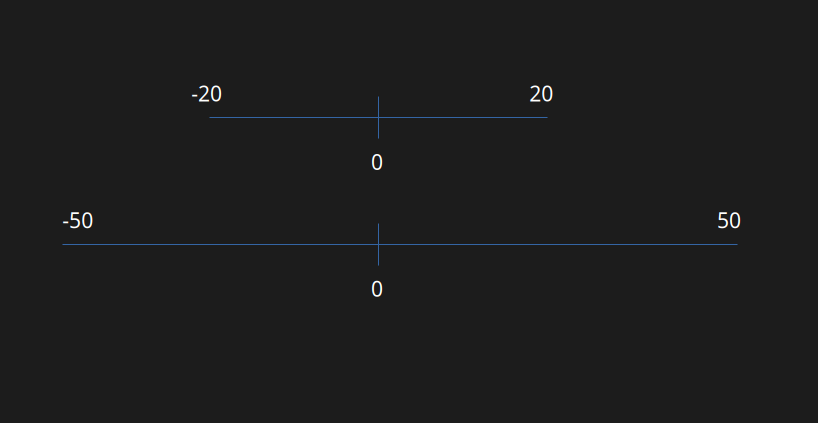

In [17]:

from IPython.display import display,Image
display(Image("img/img05.png"))


### Range: 

- Range: (-20,20), (-50,50)


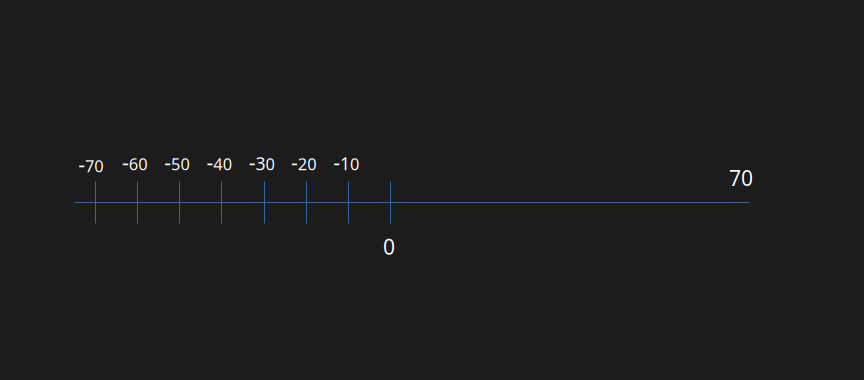

In [18]:
# Disadvantage of Range:
""" 
*************
Range(-70,70)
- But most of data in (-70,0)
*************
"""
from IPython.display import display,Image
display(Image("img/img06.png"))


### Population Variance:
Population variance ($\sigma^2$) is used when you have data for every member of the population.

$$\sigma^2 = \frac{\sum_{i=1}^{N} (x_i - \mu)^2}{N}$$

* **$\sigma^2$** (sigma-squared) is the population variance.
* **$x_i$** is each individual data point.
* **$\mu$** (mu) is the population mean.
* **$N$** is the total number of data points in the population.

### Sample Variance:
Sample variance ($s^2$) is used when you have data from only a sample of the population. The denominator is $n-1$ instead of $N$ to provide a more accurate estimate of the population variance.

$$s^2 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}$$

* **$s^2$** is the sample variance.
* **$x_i$** is each individual data point.
* **$\bar{x}$** (x-bar) is the sample mean.
* **$n$** is the total number of data points in the sample.


In [19]:

# calculate variance:
mean = array.mean()
s = 0 
for i in array:
    s += (i-mean)**2
s = s/len(array)
s 


np.float64(3.918367346938776)

In [20]:

# variance with inbuid function: 
array.var()


np.float64(3.918367346938776)


**variance = (xi-mean)^2, (unit)^2 not in actual unit:**

### Population Standard Deviation
$$\sigma = \sqrt{\frac{\sum_{i=1}^{N} (x_i - \mu)^2}{N}}$$


### Sample Standard Deviation

$$s = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}}$$

Standard deviation primarily measures the **spread** or **variability** of data.

* **High Standard Deviation:** This means the data points are spread out far from the mean. In the context of salaries, it indicates a large variation in employee pay, where some may earn much less and others much more. This suggests an **unstable or less consistent** situation.

* **Low Standard Deviation:** This means the data points are clustered very close to the mean. For salaries, it means there is very little difference in pay, with most employees earning close to the average. This indicates a **cohesive or consistent** situation.

In [21]:

# add: -ve, +ve show how mean and Standard Deviation Changes
company1 = np.array(
    [10,20,50,60,70,80]
)
print("mean company1: {}".format(np.mean(company1)))
print("std company1: {}".format(np.std(company1)))


print("\n"+"*"*20 + "\n")

company2 = np.array(
    [30,40,50]
)
print("mean com2: {}".format(np.mean(company2)))
print("std com2: {}".format(np.std(company2)))



mean company1: 48.333333333333336
std company1: 25.440562537456245

********************

mean com2: 40.0
std com2: 8.16496580927726



### **Coefficient of Variation:**

The **Coefficient of Variation (CV)** is a statistical measure of the relative dispersion of data points around the mean. Unlike standard deviation, which gives an absolute value, the CV is a unitless ratio. This makes it ideal for comparing the variability of two different datasets, even if they have different units or vastly different means, as your note correctly points out with `salary` and `experience`.

As shown in your image, the formula is:

$$CV = \frac{\text{Standard Deviation}}{\text{Mean}} \times 100\%$$



In [22]:
import numpy as np


salaries = np.array([110,120,130,140,150])
experience = np.array([1,2,3,4,5])


# --- Calculate for Salaries ---
salary_mean = np.mean(salaries)
salary_std = np.std(salaries)
salary_cv = (salary_std / salary_mean) * 100

print(f"Salary Mean: ${salary_mean:,.2f}k")
print(f"Salary Standard Deviation: ${salary_std:.2f}")
print(f"Salary Coefficient of Variation (CV): {salary_cv:.2f}%")

print("\n" + "-"*30 + "\n")

# --- Calculate for Experience ---
experience_mean = np.mean(experience)
experience_std = np.std(experience)
experience_cv = (experience_std / experience_mean) * 100

print(f"Experience Mean: {experience_mean:.2f} years")
print(f"Experience Standard Deviation: {experience_std:.2f}")
print(f"Experience Coefficient of Variation (CV): {experience_cv:.2f}%")

# --- Comparison ---
print("\n" + "-"*30 + "\n")
print(f"Comparison: The CV for salaries is {salary_cv:.2f}%, while the CV for experience is {experience_cv:.2f}%.")
if salary_cv > experience_cv:
    print("Salaries have more relative variability than experience.")
else:
    print("Experience has more relative variability than salaries.")

Salary Mean: $130.00k
Salary Standard Deviation: $14.14
Salary Coefficient of Variation (CV): 10.88%

------------------------------

Experience Mean: 3.00 years
Experience Standard Deviation: 1.41
Experience Coefficient of Variation (CV): 47.14%

------------------------------

Comparison: The CV for salaries is 10.88%, while the CV for experience is 47.14%.
Experience has more relative variability than salaries.



`The CV shows that the experience data is much more "spread out" in a meaningful way. If you were looking at two investment options, the one with the higher CV would be considered more volatile or risky, even if its standard deviation was lower in absolute terms.`

<br>
<br>

# `#6. Quantiles:`

<br>
<br>

Quantiles are statistical measures used to divide a dataset into **equal-sized groups**. They are useful for understanding the **distribution of data**, **identifying outliers**, and **comparing different datasets**. Mainly There are 4 types of quantiles: 
- Quartiles 
- Deciles 
- Percentiles

<br>

* **Percentiles:** Divide the data into 100 equal parts ($P_1$ to $P_{99}$).

### **Question:**

**"You got a 75% score (in terms of percentile rank). From the dataset, what did you actually get in the exam?"**

The dataset of exam scores is:
`[78, 82, 84, 88, 91, 93, 94, 96, 98, 99]`


### Formula and Calculation

To find the score that corresponds to the 75th percentile, we use the percentile location formula from your image.

$$PL = \frac{P}{100}(N+1)$$

* **PL** = Percentile Location (the position in the sorted data)
* **P** = The desired percentile (75)
* **N** = The total number of observations in the dataset (10)

Let's apply the formula:
$$PL = \frac{75}{100}(10+1) = 0.75 \times 11 = 8.25$$

* The value is: $96 + (0.25 \times 2) = 96 + 0.5 = 96.5$

Therefore, based on this dataset, if you are at the **75th percentile**, your score is **96.5**.


In [23]:

# 75%
P = 75
numbers = [78, 82, 84, 88, 91, 93, 94, 96, 98, 99]
sorted_numbers = sorted(numbers)

print("Index: ------ Value")
for index,val in enumerate(sorted_numbers):
    print(" {} : ------ {}".format(index+1,val))
    
N = len(numbers)
PL =  (P/100) * (N+1)  #7.5
PL

Index: ------ Value
 1 : ------ 78
 2 : ------ 82
 3 : ------ 84
 4 : ------ 88
 5 : ------ 91
 6 : ------ 93
 7 : ------ 94
 8 : ------ 96
 9 : ------ 98
 10 : ------ 99


8.25

In [24]:

floor_val = int(PL) #8

# index starting from 0 that's why we subtract -1:
my_score =  (sorted_numbers[floor_val] - sorted_numbers[floor_val-1]) * 0.25 + sorted_numbers[floor_val-1]
my_score


96.5

<br>

* **Quartiles:** Divide the data into four equal parts ($Q_1, Q_2, Q_3$).
 The 50th percentile ($Q_2$) is also the **median**.

* **Deciles:** Divide the data into ten equal parts ($D_1$ to $D_9$).

* **BrainStorming:**
$P_5$ $_0$ = $D_5$ = $Q_2$

**Important things to remember:**
* The data must be **sorted** from low to high before calculating quantiles.
* Quantiles are about the **location** of a value, not the actual value itself.

<br>

<br>
<br>

# `#7. 5 Number Summary and Box Plot:`

<br>

Five Number Summary Statistics includes the following values:
- **Minimum Value:** The smallest value in the data set.
- **First Quartile ($Q_1$):** The value that separates the lowest 25% of the data from the remaining data sets.
- **Median ($Q_2$):** The value that separates the lowest 50% from the highest 50% of the data.

- **Third Quartile ($Q_3$):** The value that separates the lowest 75% of the data from the highest 25% of the data.

- **Maximum value:** The largest value in the data set.

<br>

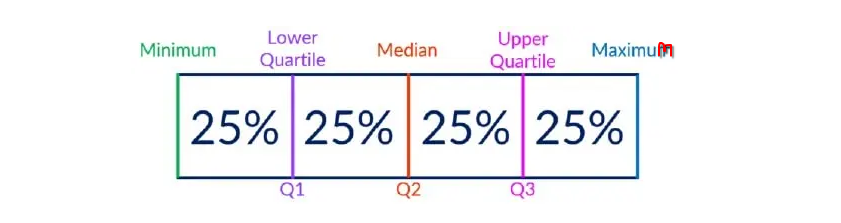

In [25]:
display(Image("img/img07.png"))


### **Interquartile Range:**
The interquartile range `(IQR)` is a measure of variability that is based on the five number summary of a dataset. It is the difference between the third quartile ($Q_3$) and the first quartile ($Q_1$) of a data set.

**IQR = $Q_3$ - $Q_1$**

<br>

### **What is a Box Plot:**
A box plot is a graphical representation of the five number summary statistics. It is also known as a box-and-whisker plot. It is used to see the distribution of the data and to detect outliers graphically/visual.

- **Minimum Value:** $Q_1$ - $1.5 \times IQR$
- **Maximum value:** $Q_1$ + $1.5 \times IQR$

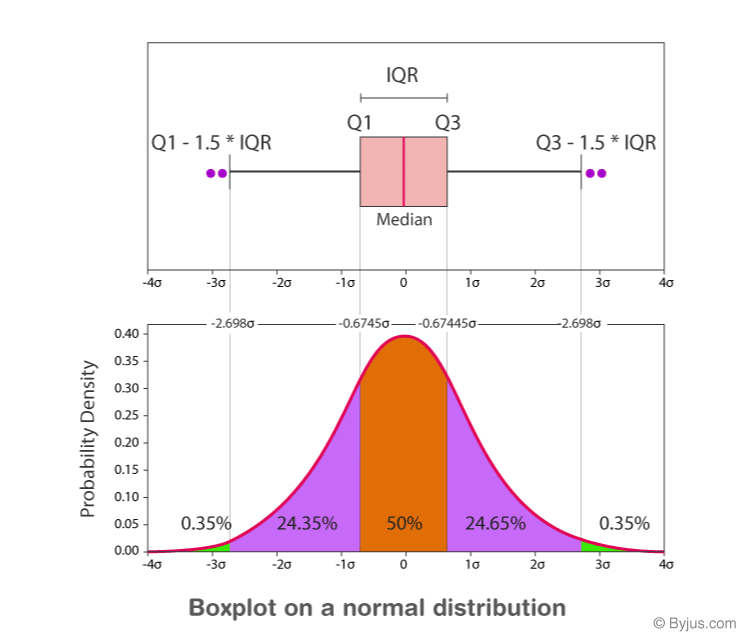

In [26]:
display(Image("img/img08.png"))

In [27]:
""" 
Example01: Given all-rounder rating of Bangladeshi Player.
"""

import matplotlib.pyplot as plt 

names = ["Tamim","Shanto","Afif","Mosadek","Nasir","Riyad","Shaif","Mahedi","Shamim","MHM","SAH"]
rating = np.array(
    [150,240, 250, 260, 275, 280, 290, 305, 310, 330, 420]
)

print("----------All Rounder Rating Of Bangladesh--------")
print("\n")
print("name--------rating")
print("******************\n")

for name,rat in zip(names,rating):
    print(f"{name}-------->{rat}")
    


----------All Rounder Rating Of Bangladesh--------


name--------rating
******************

Tamim-------->150
Shanto-------->240
Afif-------->250
Mosadek-------->260
Nasir-------->275
Riyad-------->280
Shaif-------->290
Mahedi-------->305
Shamim-------->310
MHM-------->330
SAH-------->420


In [28]:

Q1 = np.percentile(rating,25)
Q2 = np.percentile(rating,50)
Q3 = np.percentile(rating,75)

IQR = Q3-Q1

min_whisker = Q1 - (1.5*IQR)
max_whisker = Q2 + (1.5*IQR)

print(f"\n min: \n {min_whisker}")
print(f"\n max: \n {max_whisker}")
print(f"\n Q1: \n {Q1}")
print(f"\n Q2: \n {Q2}")
print(f"\n Q3: \n {Q3}")



 min: 
 176.25

 max: 
 358.75

 Q1: 
 255.0

 Q2: 
 280.0

 Q3: 
 307.5


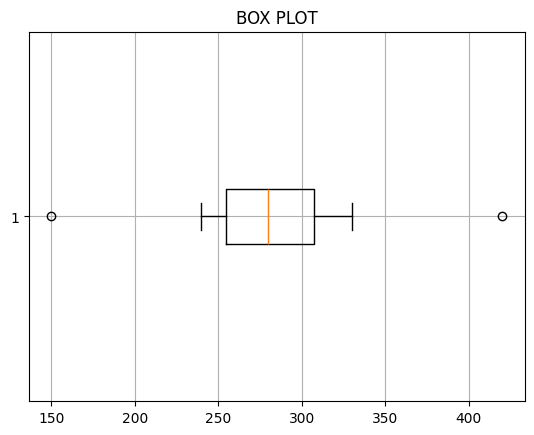

In [29]:

plt.title("BOX PLOT")
plt.boxplot(x=rating,orientation="horizontal")
plt.grid(True)
plt.show()


<br>
<br>

# `#Practise Problem:`

<br>
<br>


**Task 1: Calculate the 5-Number Summary**
Given the following dataset of exam scores, write a Python script to calculate and print the 5-number summary and the Interquartile Range (IQR).

* **Dataset:** `exam_scores = [72, 85, 91, 78, 88, 65, 95, 80, 70, 105]`

<br>

**Task 2: Visualize a Box Plot and Identify Outliers**
Using the same dataset from Task 1, create a box plot. Then, calculate the upper and lower fences to confirm if there is an outlier and mention which value is the outlier.

* **Dataset:** `exam_scores = [72, 85, 91, 78, 88, 65, 95, 80, 70, 105]`

<br>

**Task 3: Compare Variability with Coefficient of Variation**
Two different groups took the same test. The scores are as follows. Use the Coefficient of Variation (CV) to determine which group's scores are more consistent (less variable) relative to their mean.

* **Group A Scores:** `[50, 52, 55, 58, 60]`
* **Group B Scores:** `[10, 12, 15, 18, 20]`

<br>